<a href="https://colab.research.google.com/github/Giuppone/CelMech/blob/main/ML_Supervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

....
# Lets apply a simple method of machine learning that helps to predict the mass based on radius.
```
by cristian.giuppone@unc.edu.ar


In [4]:
#Importo librerías
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
#plt.style.use('seaborn-white')
#plt.style.use('classic')
plt.figure(figsize=(6.4,4.8))
import pandas
import os

<Figure size 460.8x345.6 with 0 Axes>

In [5]:
from google.colab import drive
drive.mount("/content/drive")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
#drive dir
drive_dir = '/content/drive/My Drive/tecnicasdeteccion'
os.chdir (drive_dir)

In [7]:
M1 = pandas.read_csv('exoplanet.eu_catalog.csv',delimiter=',')

In [8]:
M1.shape
# M1.mass[1:3]
# M1.radius[1:3]

(4708, 98)

In [9]:
M1.head(3)
M=M1

In [11]:
# cols = M1.columns.tolist()
M1.columns
filter = (~M1.columns.str.contains('error') & ~M1.columns.str.contains('name')) #select columns do not contain error in name
M1.columns[filter]

Index(['planet_status', 'mass', 'mass_sini', 'radius', 'orbital_period',
       'semi_major_axis', 'eccentricity', 'inclination', 'angular_distance',
       'discovered', 'updated', 'omega', 'tperi', 'tconj', 'tzero_tr',
       'tzero_tr_sec', 'lambda_angle', 'impact_parameter', 'tzero_vr', 'k',
       'temp_calculated', 'temp_measured', 'hot_point_lon', 'geometric_albedo',
       'log_g', 'publication', 'detection_type', 'mass_detection_type',
       'radius_detection_type', 'molecules', 'ra', 'dec', 'mag_v', 'mag_i',
       'mag_j', 'mag_h', 'mag_k', 'star_distance', 'star_metallicity',
       'star_mass', 'star_radius', 'star_sp_type', 'star_age', 'star_teff',
       'star_detected_disc', 'star_magnetic_field'],
      dtype='object')

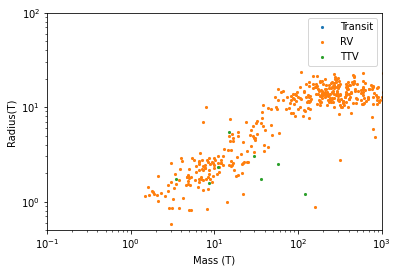

In [12]:
317.83
plt.xlabel(r"Mass (T)");
plt.ylabel("Radius(T) ");
plt.yscale('log')
plt.xscale('log')
plt.ylim(0.5,100)
plt.xlim(0.1,1000)
# plt.scatter(M1.radius*11.209,M1.mass*317.83, s=2.4, c='k', label='')


#plt.scatter(M1.mass*317.83, M1.radius*11.209, s=2.4, c='k', label='')
plt.scatter(M1.mass[M1.mass_detection_type=='Primary Transit']*317.83,M1.radius[M1.mass_detection_type=='Primary Transit']*11.209, s=4.4, label='Transit')
plt.scatter(M1.mass[M1.mass_detection_type=='Radial Velocity']*317.83,M1.radius[M1.mass_detection_type=='Radial Velocity']*11.209, s=4.4, label='RV')
plt.scatter(M1.mass[M1.detection_type=='TTV']*317.83,M1.radius[M1.detection_type=='TTV']*11.209, s=4.4, label='TTV')
plt.legend()

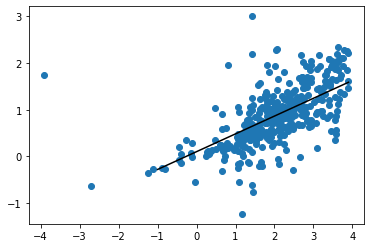

In [13]:
from math import *    #importa todas las operaciones matemáticas de math (sin, cos, tan, sqrt, pi, etc)
# x = log(M1.radius[M1.detection_type=='Radial Velocity']*11.209)
# y = log(M1.mass[M1.detection_type=='Radial Velocity']*317.83)
#z = np.polyfit(x, y, 1)

Mc = M[~(M1.radius.isnull()) & ~np.isnan(M1.radius) 
     & ~(M1.mass.isnull())   & ~np.isnan(M1.mass) ]

y = np.log(Mc.radius[Mc.mass*317.83<50]*11.209)
x = np.log(Mc.mass[Mc.mass*317.83<50]*317.83)
z = np.polyfit(x, y, 1)

xa = np.arange(-1,4,0.1)
ya = z[0]*xa+z[1]

z0t=z[0]
z1t=z[1]

plt.scatter(x,y)
plt.plot(xa,ya, c='k')

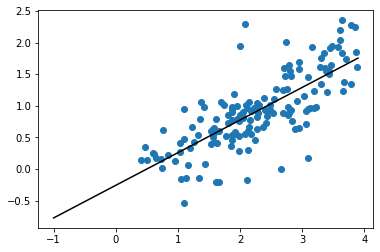

In [14]:
y = np.log(Mc.radius[(Mc.mass*317.83<50) & (Mc.mass_detection_type=='Radial Velocity') ]*11.209)
x = np.log(Mc.mass  [(Mc.mass*317.83<50) & (Mc.mass_detection_type=='Radial Velocity') ]*317.83)
z = np.polyfit(x, y, 1)

xa = np.arange(-1,4,0.1)
ya = z[0]*xa+z[1]

plt.scatter(x,y)
plt.plot(xa,ya, c='k')

In [15]:
# x2 = np.log(Mc.radius[Mc.mass<0.13]*11.209)
# y2 = np.log(Mc.mass[Mc.mass<0.13]*317.83)
# z = np.polyfit(x2, y2, 1)
# xa = np.arange(-0.5,2,0.1)
# ya = z[0]*xa+z[1]

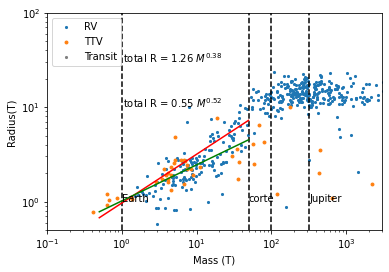

In [16]:
plt.xlabel(r"Mass (T)");
plt.ylabel("Radius(T) ");
plt.yscale('log')
plt.xscale('log')
plt.ylim(0.5,100)
plt.xlim(0.1,3000)
#plt.errorbar(M1.radius*11.209, M1.mass*317.83, xerr=M1.radius_error_max, yerr=M1.mass_error_max,fmt='o', c='gray', ms=2, zorder=-3)
plt.scatter(M1.mass[M1.mass_detection_type=='Radial Velocity']*317.83, M1.radius[M1.mass_detection_type=='Radial Velocity']*11.209, s=4.4, label='RV')
plt.scatter(M1.mass[M1.mass_detection_type=='TTV']*317.83, M1.radius[M1.mass_detection_type=='TTV']*11.209, s=8.4, label='TTV')
plt.scatter(M1.mass[M1.mass_detection_type=='Primary Transit']*317.83,M1.radius[M1.mass_detection_type=='Primary Transit']*317.83, s=4.4, label='Transit', c='gray',zorder=-2)
plt.axvline(x=1, c='k', ls='--')
plt.axvline(x=317.9, c='k', ls='--')
plt.axvline(x=50, c='k', ls='--')
plt.axvline(x=100, c='k', ls='--')
plt.text(1.01,1, 'Earth')
plt.text(320.,1, 'Jupiter')
plt.text(50.,1, 'corte')
xm = np.arange(0.5,50,1)
ym = 10**z[1]*((317.83*xm)**z[0])/11.209
yt = 10**z1t *((317.83*xm)**z0t )/11.209

total=r"$M_{star} [M_0]$"
total  = r"total R = %.2f $M^{%.2f}$" % (10**z1t,z0t)
rtotal = r"total R = %.2f $M^{%.2f}$" % (10**z[1],z[0])
plt.text(1.05,30,total)
plt.text(1.05,10,rtotal)

plt.plot(xm,ym,c='red')
plt.plot(xm,yt,c='green')
plt.legend();
# plt.plot(xa,ya, c='red');
plt.savefig('radio-masa.png',dpi=300,bbox_inches="tight")


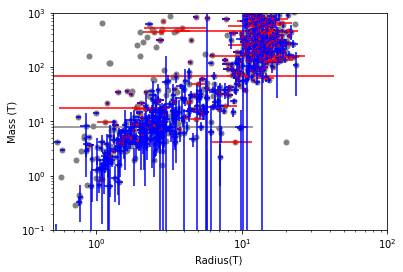

In [17]:
plt.ylabel(r"Mass (T)");
plt.xlabel("Radius(T) ");
plt.yscale('log')
plt.xscale('log')
plt.xlim(0.5,100)
plt.ylim(0.1,1000)
er = 0.1
plt.errorbar(M1.radius*11.209, M1.mass*317.83, xerr=M1.radius_error_max, yerr=M1.mass_error_max,fmt='o', c='gray', ms=5, zorder=-3)

plt.errorbar(11.209*Mc.radius[Mc.mass_error_max/Mc.mass<er],     317.83*Mc.mass[Mc.mass_error_max/Mc.mass<er],     xerr=11.209*Mc.radius_error_max[Mc.mass_error_max/Mc.mass<er], yerr=317.83*Mc.mass_error_max[Mc.mass_error_max/Mc.mass<er], fmt='o', c='red', ms=2)

plt.errorbar(11.209*Mc.radius[Mc.radius_error_max/Mc.radius<er], 317.83*Mc.mass[Mc.radius_error_max/Mc.radius<er], xerr=11.209*Mc.radius_error_max[Mc.radius_error_max/Mc.radius<er], yerr=317.83*Mc.mass_error_max[Mc.radius_error_max/Mc.radius<er], fmt='o', c='blue', ms=1)

plt.savefig('radio-masaerrores.png',dpi=300,bbox_inches="tight")




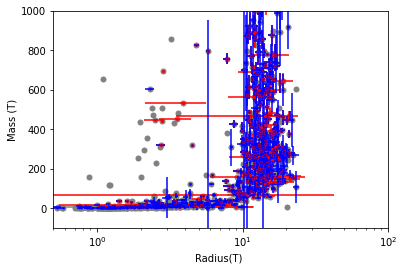

In [18]:
plt.ylabel(r"Mass (T)");
plt.xlabel("Radius(T) ");
#plt.yscale('log')
plt.xscale('log')
plt.xlim(0.5,100)
plt.ylim(-100,1000)
er = 0.1
plt.errorbar(M1.radius*11.209, M1.mass*317.83, xerr=M1.radius_error_max, yerr=M1.mass_error_max,fmt='o', c='gray', ms=5, zorder=-3)

plt.errorbar(11.209*Mc.radius[Mc.mass_error_max/Mc.mass<er],     317.83*Mc.mass[Mc.mass_error_max/Mc.mass<er],     xerr=11.209*Mc.radius_error_max[Mc.mass_error_max/Mc.mass<er], yerr=317.83*Mc.mass_error_max[Mc.mass_error_max/Mc.mass<er], fmt='o', c='red', ms=2)

plt.errorbar(11.209*Mc.radius[Mc.radius_error_max/Mc.radius<er], 317.83*Mc.mass[Mc.radius_error_max/Mc.radius<er], xerr=11.209*Mc.radius_error_max[Mc.radius_error_max/Mc.radius<er], yerr=317.83*Mc.mass_error_max[Mc.radius_error_max/Mc.radius<er], fmt='o', c='blue', ms=1)

plt.savefig('radio-masasinlog.png',dpi=300,bbox_inches="tight")

# aa = Mc.radius[Mc.mass_error_max/Mc.mass<er] and 

# Now ML supervised with mass estimation given some parameters. First only radius, and afterwards star_parameters

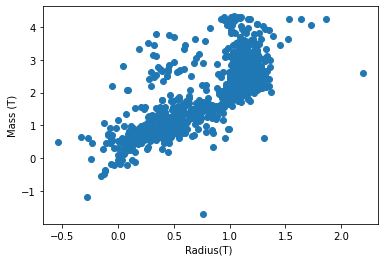

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics      import confusion_matrix 
from sklearn.metrics import mean_squared_error,r2_score
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error,r2_score

# df = pd.read_csv('Bigdata-exercises/base_datos_2008.csv')
M = M.dropna(subset=["mass","radius"])
df=M.sample(frac=1)

df.columns   #M1.radius*11.209, M1.mass*317.83
Y= np.log10(df[["mass"]]*317.83)  #True = 1, false =0 //interpretación: vuelos sin retraso notable
X= np.log10(df[["radius"]]*11.209)
# Y= df[["mass"]]  #True = 1, false =0 //interpretación: vuelos sin retraso notable
# X= df[["radius"]]

plt.ylabel(r"Mass (T)");
plt.xlabel("Radius(T) ");
plt.scatter(X,Y)



In [43]:
# np.isfinite(X).all()
# np.isfinite(Y).all()

In [45]:
regr = linear_model.LinearRegression().fit(X,Y)


print("Coeficientes: ", regr.coef_)

Y_pred = regr.predict(X)

print("regr.intercept_")

print("R cuadrado: ", r2_score(Y,Y_pred))

# logreg = LogisticRegression()
# logreg.fit(X,Y.values.ravel())

Coeficientes:  [[1.86552999]]
regr.intercept_
R cuadrado:  0.5994751498561439


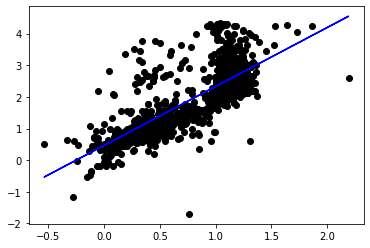

In [46]:
plt.scatter(X[0:10000],Y[0:10000], color='black')
plt.plot(X[0:10000],Y_pred[0:10000], color='blue')

In [49]:
M = M.dropna(subset=["mass","radius", "star_mass","star_age","star_teff"])
df=M.sample(frac=1)

df.columns   #M1.radius*11.209, M1.mass*317.83
Y= np.log10(df[["mass"]]*317.83)  #True = 1, false =0 //interpretación: vuelos sin retraso notable

X= df[["radius", "star_mass","star_age","star_teff"]].dropna() 
X.radius = np.log10(X.radius*11.209)

# ahora vamos a hacer una regresion lineal
regr = linear_model.LinearRegression().fit(X,Y)

Y_pred = regr.predict(X)

print("R cuadrado: ", r2_score(Y,Y_pred))   #muy mal acuerdo fijarse q no estaba agregado retraso en salida

R cuadrado:  0.6891014822056251


In [53]:
X

,radius,star_mass,star_age,star_teff
420,0.939429,0.910,6.400,5406.0
438,0.832039,0.843,11.460,5326.0
3401,0.954282,1.040,0.300,6018.0
3280,1.135571,1.320,2.800,6041.0
394,1.262021,1.435,2.765,6212.0
...,...,...,...,...
4550,1.064927,0.717,0.400,4520.0
4506,1.245467,1.490,1.200,6900.0
189,0.259082,0.970,5.000,5617.0
4477,1.140882,1.087,1.900,5900.0


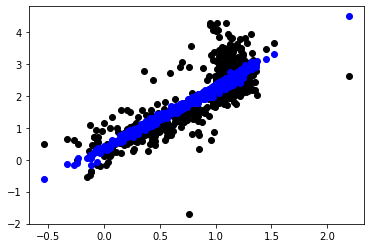

In [56]:
#improves 
plt.scatter(X.radius[0:10000],Y[0:10000], color='black')
plt.scatter(X.radius[0:10000],Y_pred[0:10000], color='blue')